**Aim:** Apply EM (GMM model) algorithm to cluster a set of data stored in a .CSV file.
Use the same data set for clustering using k-Means algorithm.

**Theory**

**Introduction to Clustering**

Clustering can be defined as "A way of grouping the data points into different clusters, consisting of similar data points. The objects with the possible similarities remain in a group that has less or no similarities with another group."

Clustering is done by finding some similar patterns in the unlabelled dataset such as shape, size, color, behavior, etc., and divides them as per the presence and absence of those similar patterns.

Clustering is an unsupervised learning method, hence no supervision is provided to the algorithm, and it deals with the unlabeled dataset.

The clustering technique can be widely used in various tasks. Some most common uses of this technique are:

Market Segmentation

Statistical data analysis

Social network analysis

Image segmentation

Anomaly detection, etc.

**Introduction to k-means Clustering**

k-means clustering is a distance-based algorithm. This means that it tries to group the closest points to form a cluster

In K-means clustering, first define the number of groups that we want to divide the population into – that’s the value of k. 

Based on the number of clusters or groups we want, we then randomly initialize k centroids.

The data points are then assigned to the closest centroid and a cluster is formed. The centroids are then updated and the data points are reassigned. This process goes on iteratively until the location of centroids no longer changes.



**Drawbacks of k-means Clustering**

Generally, In K-means clustering, all the clusters created have a circular shape. This is because the centroids of the clusters are updated iteratively using the mean value.


Now, consider the following example where the distribution of points is not in a circular form. 

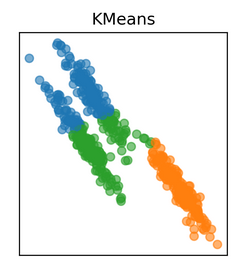




If K-means clustering apply on these data, it would still attempt to group the data points in a circular fashion. But, k-means fails to identify the right clusters.
So, we need a different way to assign clusters to the data points. So instead of using a **distance-based model**, we will now use a **distribution-based model**. So, Gaussian Mixture Model with Expectation-Maximization approch can be used in this situation for clustering.

**Introduction to Gaussian Mixture Models (GMMs)**

Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

Gaussian Mixture Models are probabilistic models and use the soft clustering approach for distributing the points in different clusters

Suppose, we have three Gaussian distributions - GD1, GD2, and GD3. These have a certain mean (μ1, μ2, μ3) and variance (σ1, σ2, σ3) values respectively. For a given set of data points, GMM would identify the probability of each data point belonging to each of these distributions.

**What is EM Algorithm**

Expectation-Maximization (EM) is a statistical algorithm for finding the right model parameters.

Being an iterative approach, it consists of two modes. 

**Expectation step (E - step):** In the first mode, we estimate the missing or latent variables. Hence it is referred to as the Expectation/estimation step (E-step). 

**Maximization step (M - step):** This mode is used to optimize the parameters of the models so that it can explain the data more clearly. The second mode is known as the maximization-step or M-step.

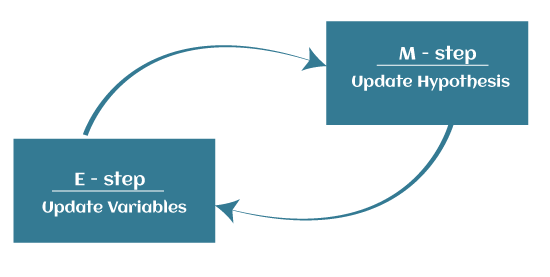

**Expectation-Maximization in Gaussian Mixture Models**

Suppose using GMM, assign k number of clusters. This means that there are k Gaussian distributions, with the mean and covariance values to be μ1, μ2, .. μk and Σ1, Σ2, .. Σk . Additionally, there is another parameter for the distribution that defines the number of points for the distribution. Or in other words, the density of the distribution is represented with Πi.


To find the values for these parameters to define the Gaussian distributions. We already decided the number of clusters, and randomly assigned the values for the mean, covariance, and density. Next, we’ll perform the E-step and the M-step.

**E-step:**
For each point xi, calculate the probability that it belongs to cluster/distribution c1, c2, … ck.
This value will be high when the point is assigned to the right cluster and lower otherwise

**M-step:**
Post the E-step, we go back and update the Π, μ and Σ values. These are updated in the following manner:

The new density is defined by the ratio of the number of points in the cluster and the total number of points:
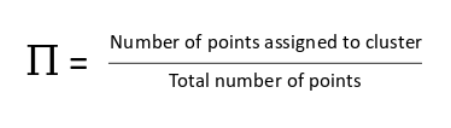

The mean and the covariance matrix are updated based on the values assigned to the distribution, in proportion with the probability values for the data point. Hence, a data point that has a higher probability of being a part of that distribution will contribute a larger portion:

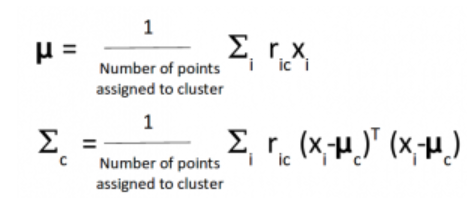

Based on the updated values generated from this step, we calculate the new probabilities for each data point and update the values iteratively. 

So,
k-means generally considers the mean to update the centroid while GMM takes into account the mean as well as the variance of the data.

##**Import necessory libraries**

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd
import numpy as np

##**K-means and GMM algorithm libraries**

In [29]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [30]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

##**Import dataset**

In [31]:
dataset = pd.read_csv("/content/drive/MyDrive/data sets _preprocessing_01/Iris_data - Iris_data (1).csv")
dataset

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
dataset.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width', 'Class']
dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


##**Define column name to dataframe**

In [33]:
names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width', 'Class']
dataset = pd.read_csv("/content/drive/MyDrive/data sets _preprocessing_01/Iris_data - Iris_data (1).csv", names=names)
dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


##**Divide data into Input and target features**

In [34]:
X = dataset.iloc[:, :-1]  

In [35]:
dataset.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [36]:
label = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica': 2} 

y = [label[a] for a in dataset.iloc[:, -1]]

In [37]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

##**Plot the scatter plot of acual data**

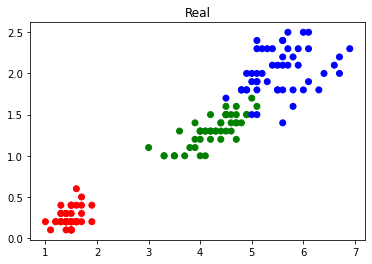

In [38]:
colormap=np.array(['red','green','blue'])
import matplotlib.pyplot as plt
plt.title('Real')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y])

##**K means for clustering**

In [39]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3, random_state=0).fit(X)
kMeans_labels=model.predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
kMeans_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

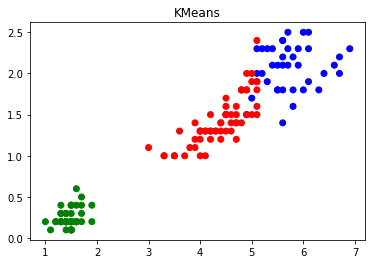

In [41]:
import matplotlib.pyplot as plt
plt.title('KMeans')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[kMeans_labels])

In [42]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

print('The accuracy score of K-Mean:',metrics.accuracy_score(y, kMeans_labels))
#print('The Confusion matrix of K-Mean:',metrics.confusion_matrix(y, kMeans_labels))

The accuracy score of K-Mean: 0.24


##**Use GMM algorithm**

In [43]:
from sklearn.mixture import GaussianMixture
em=GaussianMixture(n_components=3, random_state=0).fit(X)
y_cluster_em=em.predict(X)
y_cluster_em

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

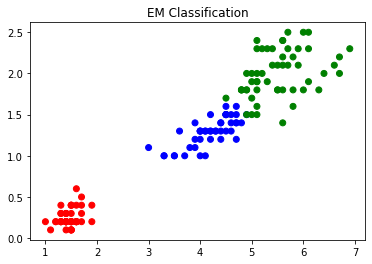

In [44]:
plt.title('EM Classification')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_em])

In [45]:
print('The accuracy score of EM: ',metrics.accuracy_score(y, y_cluster_em))
print('The Confusion matrix of EM: ',metrics.confusion_matrix(y, y_cluster_em))

The accuracy score of EM:  0.36666666666666664
The Confusion matrix of EM:  [[50  0  0]
 [ 0  5 45]
 [ 0 50  0]]


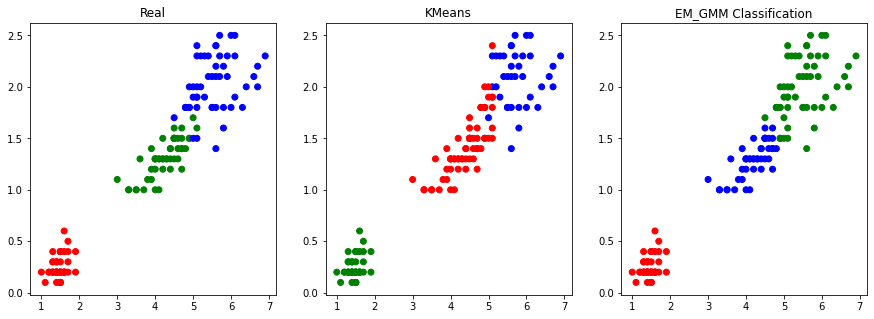

In [46]:
plt.figure(figsize=(15,5))
colormap=np.array(['red','green','blue'])

# REAL PLOT
plt.subplot(1,3,1)
plt.title('Real')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y])

# K-PLOT
plt.subplot(1,3,2)
plt.title('KMeans')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[kMeans_labels])

# EM PLOT
plt.subplot(1,3,3)
plt.title('EM_GMM Classification')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_em])



##**Task**

1. Import clustering_data.csv
2. Use KNN clustering for training using 4 clusters
3. Perform predictions using KNN model
4. Plot KNN model clustering results using scatter plot
5. Use Gaussian mixture clustering model for traing using 4 clusters.
6. Perform predictions using Gaussian mixture clustering model
7. Plot Gaussian mixture clustering model results using scatter plot

**1. Import clustering_data.csv**

In [47]:
df1 = pd.read_csv("/content/drive/MyDrive/data sets _preprocessing_01/Clustering_Data - Clustering_Data (1).csv")
df1

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388668
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


In [48]:
a = df1.Weight
b = df1.Height

**2. Use KNN clustering for training using 4 clusters and  3. Perform predictions using KNN model**

In [49]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df1)
pred = kmeans.predict(df1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
frame = pd.DataFrame(df1)
frame['cluster'] = pred
frame.columns = ['Weight','Height', 'cluster']
frame

,Weight,Height,cluster
0,67.062924,176.086355,1
1,68.804094,178.388668,1
2,60.930863,170.284496,0
3,59.733843,168.691992,0
4,65.431230,173.763679,1
...,...,...,...
495,59.976983,169.679741,0
496,66.423814,174.625574,1
497,53.604698,161.919208,2
498,50.433644,160.794875,2


**4. Plot KNN model clustering results using scatter plot**

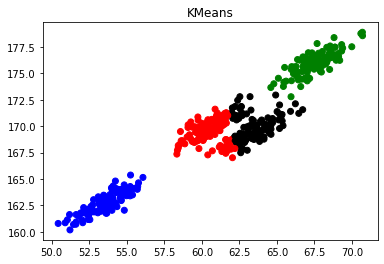

In [51]:
color = np.array(['red','green','blue','black'])
plt.title('KMeans')
plt.scatter(a,b,c=color[frame.cluster])

**5.Use Gaussian mixture clustering model for traing using 4 clusters.**

In [52]:
c = frame.iloc[:,:-1]

In [53]:
em1 = GaussianMixture(n_components=4, random_state=0).fit(c)

**6. Perform predictions using Gaussian mixture clustering model**

In [54]:
cluster_em1 = em1.predict(c)
cluster_em1

array([0, 0, 2, 2, 0, 3, 3, 2, 2, 1, 3, 0, 3, 1, 2, 2, 0, 2, 1, 2, 2, 0,
       3, 1, 2, 1, 0, 3, 1, 3, 3, 3, 0, 3, 3, 0, 1, 2, 1, 0, 1, 2, 2, 0,
       3, 0, 2, 2, 0, 0, 1, 1, 3, 2, 2, 3, 3, 1, 1, 0, 0, 1, 0, 0, 0, 3,
       2, 0, 2, 3, 1, 2, 1, 0, 1, 0, 3, 3, 2, 2, 1, 2, 1, 2, 2, 3, 1, 1,
       0, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1, 2, 2, 3, 0, 2, 1,
       1, 3, 1, 1, 0, 1, 0, 2, 3, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1,
       3, 1, 1, 1, 2, 0, 2, 3, 0, 0, 0, 0, 3, 1, 2, 2, 3, 1, 1, 0, 2, 2,
       2, 3, 3, 0, 3, 2, 0, 2, 0, 0, 3, 3, 0, 2, 1, 3, 0, 1, 0, 3, 2, 1,
       2, 1, 1, 1, 0, 0, 0, 2, 3, 1, 3, 0, 3, 1, 0, 3, 1, 3, 3, 1, 2, 3,
       2, 1, 1, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 0, 0, 0, 2, 0, 3, 1, 1, 1,
       2, 0, 3, 1, 3, 0, 1, 2, 1, 3, 3, 3, 3, 3, 2, 2, 2, 3, 1, 0, 0, 3,
       3, 0, 1, 1, 2, 0, 2, 2, 2, 3, 0, 1, 2, 1, 1, 3, 1, 3, 2, 2, 0, 1,
       0, 0, 2, 2, 1, 0, 2, 1, 0, 3, 0, 1, 3, 3, 2, 0, 0, 2, 0, 3, 0, 3,
       3, 0, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0,

**7. Plot Gaussian mixture clustering model results using scatter plot**

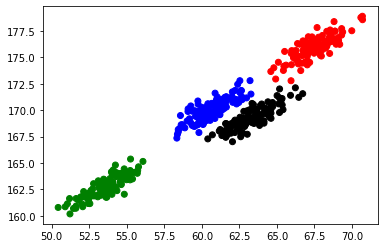

In [55]:
plt.scatter(a,b,c=color[cluster_em1])